<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates the use of an Artificial Neural Network (ANN) to perform predictions on the MNIST dataset. The MNIST dataset consists of grayscale images of handwritten digits (0-9), and the task is to classify these digits. The notebook includes steps to load and preprocess the MNIST data, build an ANN model using TensorFlow/Keras, train the model on the training data, evaluate its performance on the test data, and make predictions. The ANN architecture typically includes input, hidden, and output layers, with appropriate activation functions, loss function (e.g., categorical crossentropy for multiclass classification), and optimizer (e.g., Adam optimizer). Training involves optimizing the model's weights and biases using backpropagation and gradient descent. The notebook may also include visualization of training/validation metrics.

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 24s 2us/step


In [4]:
x_train.shape

(60000, 28, 28)

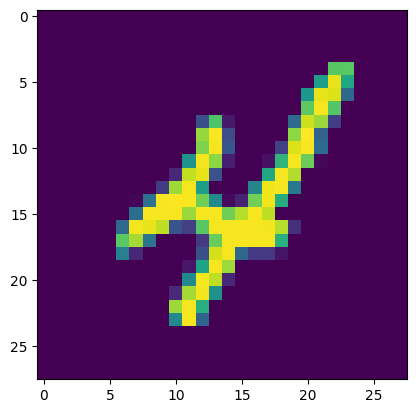

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[9])

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
model = Sequential()

In [8]:
# Add a Flatten layer to reshape the input data from 28x28 images to a 1D array (784 elements).
model.add(Flatten(input_shape=(28,28)))

# Add a Dense layer with 128 neurons and ReLU activation function.
# This layer serves as the first hidden layer in the neural network, capturing complex patterns in the data.
model.add(Dense(128,activation='relu'))

# This layer further refines the learned features, enhancing the network's representation capabilities.
model.add(Dense(32,activation='relu'))

# Add the output layer with 10 neurons (for the 10 classes in MNIST) and softmax activation function.
# The softmax activation ensures that the output values represent probabilities for each class.
model.add(Dense(10, activation='softmax'))

C:\Users\Admin\anaconda3\envs\DL0\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Difference between categorical_crossentropy and sparse_categorical_crossentropy is that we don't have to encode target column in case of sparse_categorical_crossentropy

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [10]:
history = model.fit(x_train,y_train,epochs=18,validation_split=0.2)

Epoch 1/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.4752 - val_loss: 0.1474
Epoch 2/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1342 - val_loss: 0.1122
Epoch 3/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0929 - val_loss: 0.0981
Epoch 4/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0647 - val_loss: 0.1044
Epoch 5/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0515 - val_loss: 0.1029
Epoch 6/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0385 - val_loss: 0.1004
Epoch 7/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0333 - val_loss: 0.1094
Epoch 8/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0241 - val_loss: 0.1028
Epoch 9/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0224 - val_loss: 0.1143
Epoch 10/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0192 - val_loss: 0.1217
Epoch 11/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0149 - val_loss: 0.1158
Epoch 12/18
1500/1500 ━━━━━━

In [11]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [12]:
y_prob

array([[3.4602808e-13, 1.0630341e-13, 1.1334896e-07, ..., 9.9999988e-01,
        2.3260785e-14, 7.4962953e-13],
       [1.1036052e-17, 5.6460664e-10, 1.0000000e+00, ..., 1.1165817e-18,
        4.2117378e-13, 5.3437844e-26],
       [1.4769288e-11, 9.9997103e-01, 2.0687628e-05, ..., 9.6376129e-07,
        7.3077081e-06, 4.9181081e-10],
       ...,
       [6.4454304e-25, 8.9304239e-17, 1.7596593e-25, ..., 4.5232881e-10,
        5.4486411e-14, 7.9043512e-06],
       [2.7043297e-15, 3.0934502e-23, 6.7254570e-23, ..., 1.0182535e-12,
        1.5084562e-09, 2.5148665e-16],
       [5.0861210e-18, 4.0764182e-14, 8.2593215e-20, ..., 1.5641804e-19,
        8.2787015e-16, 4.6345927e-17]], dtype=float32)

In [13]:
# Calculate the predicted class labels (y_pred) from the predicted probabilities (y_prob) using argmax(axis=1).
# The argmax(axis=1) operation selects the index with the highest probability along the second axis (axis=1),
# effectively determining the predicted class for each input sample based on the highest probability.
y_pred = y_prob.argmax(axis=1)

In [14]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9759

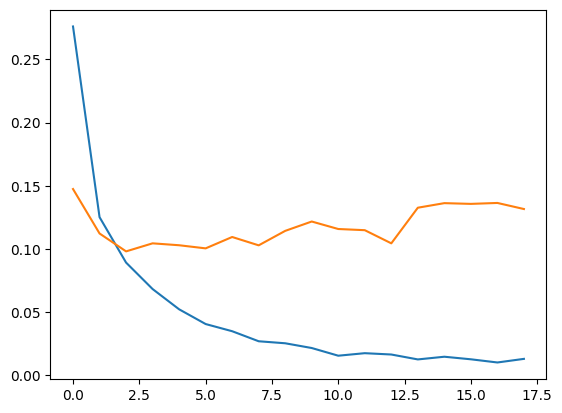

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

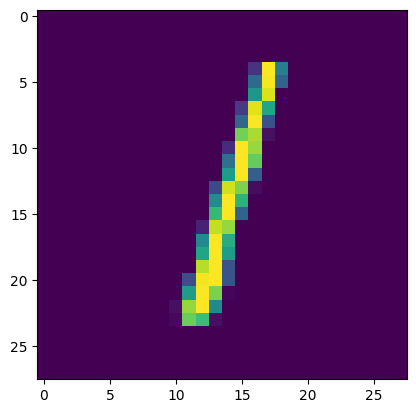

In [17]:
plt.imshow(x_test[2])

In [18]:
model.predict(x_test[2].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[1.4769345e-11, 9.9997103e-01, 2.0687608e-05, 2.0735372e-10,
        5.7230337e-10, 1.3483015e-08, 7.2279485e-09, 9.6376129e-07,
        7.3077290e-06, 4.9181176e-10]], dtype=float32)

In [19]:
model.predict(x_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([1], dtype=int64)